# Xns11 examples

#### Opening files and finding cross sections.

In [46]:
# Open an xns11 file by first importing Xns11, then creating an object with the file path.

from mikeio1d import Xns11
xns = Xns11("../tests/testdata/mikep_cs_demo.xns11")
xns

<mikeio1d.Xns11>

In [47]:
# Print some basic information about the file.
xns.info()

# Cross sections: 103
Interpolation type: ProcessedTopDown


In [48]:
# An xns11 file containes many cross sections acessible via the 'xsections' attribute.
xns.xsections

<CrossSectionCollection 103>

In [49]:
# You can index specific cross sections using their location id, chainage, and topo id.
# For example, to access the cross section at location 'basin_left1', chainage '122.042', and topo id '1':
xns.xsections['basin_left1','122.042','1']

<CrossSection: basin_left1, 122.042, 1>

In [50]:
# Use '...' as a wildcard to get a CrossSectionCollection matching the specified criteria.
xns.xsections['basin_left1', ..., '1']

<CrossSectionCollection 12>

In [51]:
# You can also provide fewer arguments and the remaining ones will automatically use '...'.
# For example, xns.xsections['basin_left1', ..., ...] can be more concisely expressed as:
xns.xsections['basin_left1']

<CrossSectionCollection 12>

In [52]:
# You can also use the 'sel' method for explicit keyword arguments (however without autocompletion).
xns.xsections.sel(chainage='122.042')

<CrossSectionCollection 1>

In [53]:
# xsections is also 'dict-like', meaning you can work with it like a dictionary. For example, you can combine two collections:

new_collection = xns.xsections['basin_left1']
print("Collection #1:", new_collection)

new_collection.update(xns.xsections['basin_left2'])
print("Collection #2:", new_collection)

Collection #1: <CrossSectionCollection 12>
Collection #2: <CrossSectionCollection 20>


In [58]:
# You can access some basic properties of the collection:
print(new_collection.location_ids)
print(new_collection.chainages)
print(new_collection.topo_ids)

['basin_left2', 'basin_left1']
['341.152', '122.042', '159.062', '184.886', '398.991', '264.614', '284.638', '281.473', '80.945', '94.137', '2.004', '166.107', '210.212', '341.557', '434.188', '481.451', '214.431', '33.774', '29.194', '413.617']
['1']


### Reading and plotting cross sections

In [54]:
# Read a cross section into a pandas DataFrame.
df = xns.xsections['basin_left1','122.042','1'].read()
df.head()

,x,z
0,0.000,59.508
1,2.062,59.624
2,4.124,59.754
3,6.186,59.607
4,14.435,58.882


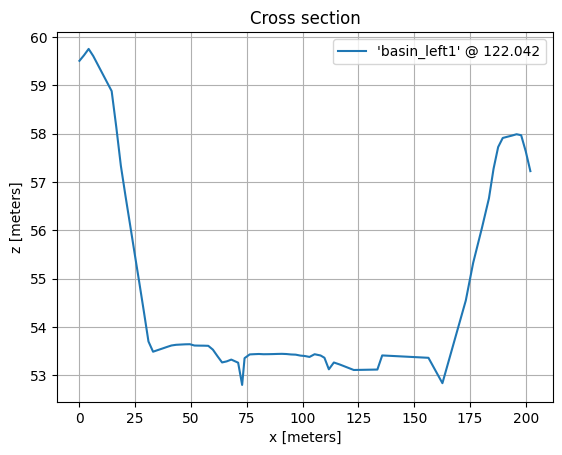

In [55]:
# Plot the cross section.
ax = xns.xsections['basin_left1','122.042','1'].plot()

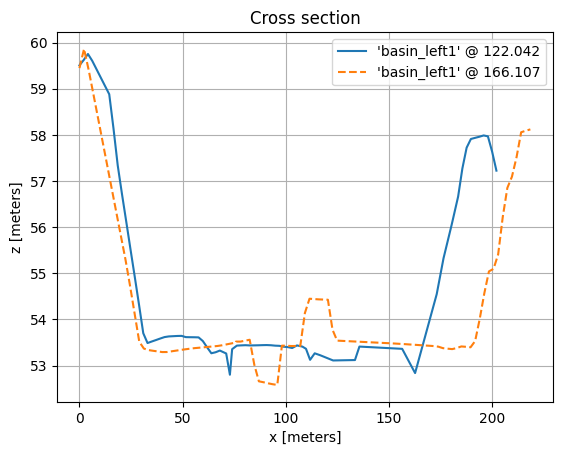

In [56]:
# Plot another cross section on the same axis.
ax = xns.xsections['basin_left1','166.107', '1'].plot(ax=ax, linestyle='--')

### Plotting cross sections with GeoPandas

<Axes: >

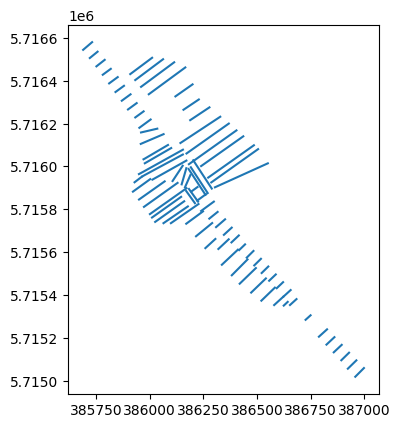

In [57]:
# You can convert xsections into a GeoDataframe. Note that this requires installation of geopandas.
gdf = xns.xsections.to_geopandas()
gdf.plot()